In [42]:
import statsmodels
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse


In [56]:
data=pd.read_excel("C:\\Users\\NTITICH\\Downloads\\BKAM.xlsx")
data = data.rename(columns={'Mois': 'date'})
data['TI'] = data['TI'].str.replace(',', '.')
data['TI'] = data['TI'].str.replace('%', '').astype(float)
data['Inflation'] = pd.to_numeric(data['Inflation'], errors='coerce')
data = data.set_index('date')
data.head()

,Inflation,TI
date,,
2018-01-01,2.0,3.24
2018-02-01,1.4,3.12
2018-03-01,1.7,3.10
2018-04-01,2.2,3.08
2018-05-01,2.4,3.11


In [43]:

data.describe()

[[ 1.         -0.48679224]
 [-0.48679224  1.        ]]


,Inflation,TI
count,68.000000,68.000000
mean,2.704412,2.807059
std,2.977098,0.261808
min,-0.700000,2.210000
25%,0.375000,2.595000
50%,1.450000,2.855000
75%,4.925000,3.032500
max,10.100000,3.240000


In [44]:
print(np.corrcoef(data['TI'], data['Inflation']))

[[ 1.         -0.48679224]
 [-0.48679224  1.        ]]


In [36]:

from statsmodels.tsa.stattools import grangercausalitytests



max_lag = 2  
test_result = grangercausalitytests(data, max_lag, verbose=True)

print(test_result.values())




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.7232  , p=0.0027  , df_denom=64, df_num=1
ssr based chi2 test:   chi2=10.1790 , p=0.0014  , df=1
likelihood ratio test: chi2=9.4761  , p=0.0021  , df=1
parameter F test:         F=9.7232  , p=0.0027  , df_denom=64, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2783  , p=0.0444  , df_denom=61, df_num=2
ssr based chi2 test:   chi2=7.0940  , p=0.0288  , df=2
likelihood ratio test: chi2=6.7380  , p=0.0344  , df=2
parameter F test:         F=3.2783  , p=0.0444  , df_denom=61, df_num=2
dict_values([({'ssr_ftest': (9.723223600090709, 0.002726192592744609, 64.0, 1), 'ssr_chi2test': (10.17899970634496, 0.001420492226402793, 1), 'lrtest': (9.476129999046464, 0.002081626252954525, 1), 'params_ftest': (9.723223600090726, 0.002726192592744572, 64.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000018467197940>, <statsmodels.regression.linear_model.

In [9]:

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])


check_stationarity(data['Inflation'])
check_stationarity(data['TI'])


ADF Statistic: -1.0289637893715808
p-value: 0.7425544122485319
Critical Values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
ADF Statistic: -1.9505066680453202
p-value: 0.30868658095999824
Critical Values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}


In [10]:

diff_data = data.diff().dropna()
check_stationarity(diff_data['Inflation'])
check_stationarity(diff_data['TI'])

ADF Statistic: -6.619326978344885
p-value: 6.093156155296404e-09
Critical Values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
ADF Statistic: -10.150960057251037
p-value: 7.953612834759944e-18
Critical Values: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}


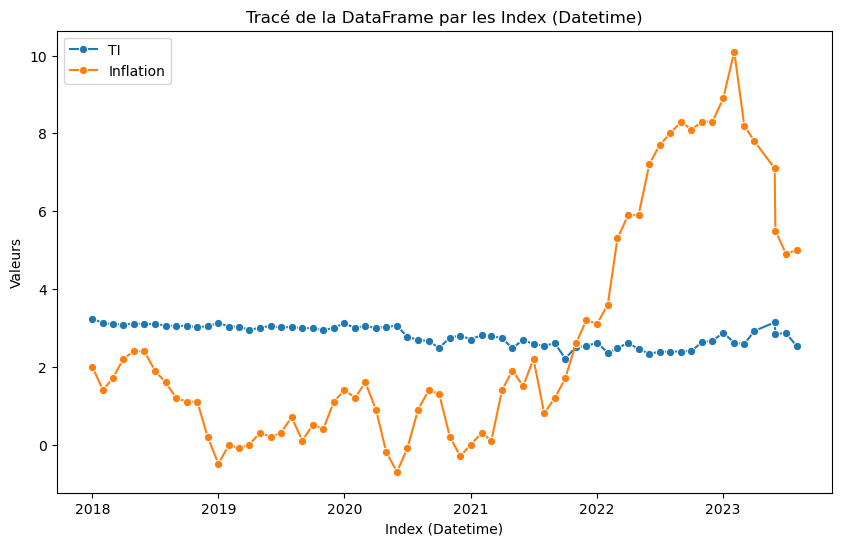

In [14]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=data.index, y=data["TI"], label="TI", marker='o')
sns.lineplot(x=data.index, y=data["Inflation"], label="Inflation", marker='o')


plt.title("Tracé de la DataFrame par les Index (Datetime)")
plt.xlabel("Index (Datetime)")
plt.ylabel("Valeurs")
plt.legend()


plt.show()

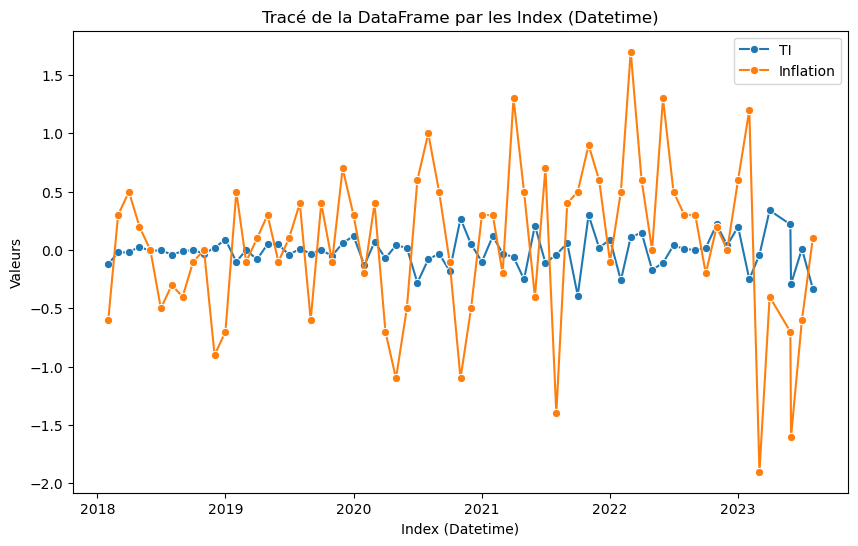

In [15]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=diff_data.index, y=diff_data["TI"], label="TI", marker='o')
sns.lineplot(x=diff_data.index, y=diff_data["Inflation"], label="Inflation", marker='o')


plt.title("Tracé de la DataFrame par les Index (Datetime)")
plt.xlabel("Index (Datetime)")
plt.ylabel("Valeurs")
plt.legend()


plt.show()

In [33]:


model = VAR(data)


order = model.select_order(maxlags=12)


model_fitted = model.fit(order.bic)

print(model_fitted.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 08, Dec, 2023
Time:                     18:06:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.60324
Nobs:                     67.0000    HQIC:                  -4.72255
Log likelihood:          -23.3152    FPE:                 0.00822519
AIC:                     -4.80067    Det(Omega_mle):      0.00753528
--------------------------------------------------------------------
Results for equation Inflation
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                3.227492         1.007622            3.203           0.001
L1.Inflation         0.933334         0.030022           31.088           0.000
L1.TI               -1.068837         0.342773           -3.

C:\Users\NTITICH\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [58]:

forecast = model_fitted.forecast(model_fitted.endog, steps=len(data))

print(forecast)




forecast_df = pd.DataFrame(forecast, index=data.index, columns=data.columns)

from sklearn.metrics import mean_squared_error
import math

rmse_val = math.sqrt(mean_squared_error(data['Inflation'].values, forecast_df['Inflation'].values))
print(f'RMSE: {rmse_val}')




[[5.19000522 2.56373179]
 [5.3312898  2.5914893 ]
 [5.43348727 2.61435172]
 [5.50443545 2.63320214]
 [5.5505058  2.64876321]
 [5.57687257 2.6616264 ]
 [5.58773293 2.67227584]
 [5.58648676 2.68110785]
 [5.57588369 2.68844694]
 [5.55814319 2.69455884]
 [5.53505275 2.69966121]
 [5.50804805 2.70393239]
 [5.47827844 2.70751852]
 [5.44666047 2.71053939]
 [5.41392152 2.71309325]
 [5.38063548 2.7152607 ]
 [5.34725183 2.7171079 ]
 [5.31411937 2.71868918]
 [5.28150559 2.7200492 ]
 [5.2496124  2.72122467]
 [5.218589   2.72224581]
 [5.18854237 2.72313754]
 [5.15954571 2.72392038]
 [5.13164541 2.72461129]
 [5.10486664 2.72522429]
 [5.0792179  2.72577101]
 [5.05469469 2.72626108]
 [5.03128254 2.72670251]
 [5.00895937 2.72710198]
 [4.98769742 2.72746507]
 [4.96746483 2.72779645]
 [4.94822688 2.72810004]
 [4.92994695 2.72837917]
 [4.91258733 2.72863662]
 [4.89610983 2.72887478]
 [4.88047626 2.72909568]
 [4.8656488  2.72930107]
 [4.85159031 2.72949243]
 [4.8382645  2.72967107]
 [4.82563614 2.72983812]
